In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('adult.csv', delimiter=',')

In [4]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
X = data.drop('income', axis=1)
y = data['income']

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
obj = list(X.dtypes[X.dtypes=='object'].index)

In [9]:
X = pd.get_dummies(X, obj)

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 108 entries, age to native-country_Yugoslavia
dtypes: int64(6), uint8(102)
memory usage: 7.0 MB


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

logreg = LogisticRegression(solver='lbfgs')
tree = DecisionTreeClassifier()
sgd_c = SGDClassifier(loss='log', tol=0.21)

models = {'logreg':{'model':logreg, 'params':{'C':[10,1,0.1,0.01,0.001]}},
          'tree':{'model':tree, 'params':{'max_depth':[1,2,3,4,5,6,8,9,10,11]}},
          'sgd':{'model':sgd_c, 'params':{'max_iter':[500, 1000, 2000]}}
         }

std_scaler = StandardScaler()

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_tr_scaled = std_scaler.fit_transform(X_train)

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [22]:
from sklearn.model_selection import GridSearchCV
predict_probas = []

for k, v in models.items():
    print(v)
    gs = GridSearchCV(v.get('model'), v.get('params'), cv=5)
    gs.fit(X_tr_scaled, y_train)
    predict_probas.append(gs.best_estimator_.predict_proba(std_scaler.transform(X_test)))

{'model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False), 'params': {'C': [10, 1, 0.1, 0.01, 0.001]}}


/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


{'model': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'params': {'max_depth': [1, 2, 3, 4, 5, 6, 8, 9, 10, 11]}}


/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


{'model': SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.21,
       validation_fraction=0.1, verbose=0, warm_start=False), 'params': {'max_iter': [500, 1000, 2000]}}


/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


logreg 	 :0.907
tree 	 :0.907
sgd 	 :0.864


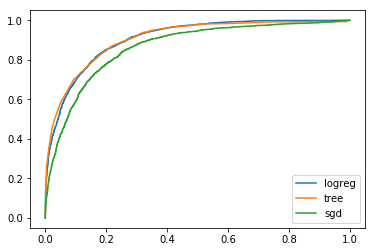

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve, r2_score

for proba, model_name in zip(predict_probas, models.keys()):
    fpr, tpr, thre = roc_curve(y_test, proba[:,1])
    print(model_name, '\t :{0:.3f}'.format(roc_auc_score(y_test, proba[:,1])))
    plt.plot(fpr, tpr, label=model_name)

plt.legend()
